In [1]:
import os
import pickle

# Define the root directory where your folder structure is located
root_directory = './data'

# Create a dictionary to organize the loaded data
data_dict = {}

# Recursively traverse the folder structure
for root, dirs, files in os.walk(root_directory):
    for file in files:
        if file == 'freq_axes.pkl':
            # Extract taps and winsizes from the folder name
            folder_name = os.path.basename(root)
            taps, winsize = folder_name.split('_')[1], folder_name.split('_')[3]
            taps = int(taps)
            winsize = int(winsize)

            if taps not in data_dict:
                data_dict[taps] = {}

            if winsize not in data_dict[taps]:
                data_dict[taps][winsize] = {}

            # Load freq_axes.pkl
            with open(os.path.join(root, file), 'rb') as f:
                data_dict[taps][winsize]['freq_axes'] = pickle.load(f)

        elif file == 'spec_axes.pkl':
            # Load spec_axes.pkl
            with open(os.path.join(root, file), 'rb') as f:
                data_dict[taps][winsize]['spec_axes'] = pickle.load(f)

# Now, data_dict contains the organized data separated by taps and winsizes
# You can access the loaded data using the taps and winsizes as keys
# For example, to access freq_axes for taps=128 and winsize=1024:



freq_axes_data = data_dict[128][1024]['freq_axes']
spec_axes_data = data_dict[128][1024]['spec_axes']

# You can repeat the above lines to access data for other taps and winsizes as needed.

# delta_q = 5
# taps_it = [4, 8, 16, 32, 64, 128, 256, 512]
# n_window_it = 

In [2]:
import numpy as np

def linear_interpolate(shorter_array, longer_array):
    """
    Linearly interpolate a shorter array to match the length of a longer array.

    Parameters:
        shorter_array (numpy.ndarray): The shorter array for interpolation.
        longer_array (numpy.ndarray): The longer array for interpolation.

    Returns:
        numpy.ndarray: The interpolated shorter array.
    """
    interpolated_shorter_array = np.interp(
        np.linspace(0, 1, len(longer_array)),
        np.linspace(0, 1, len(shorter_array)),
        shorter_array
    )

    return interpolated_shorter_array


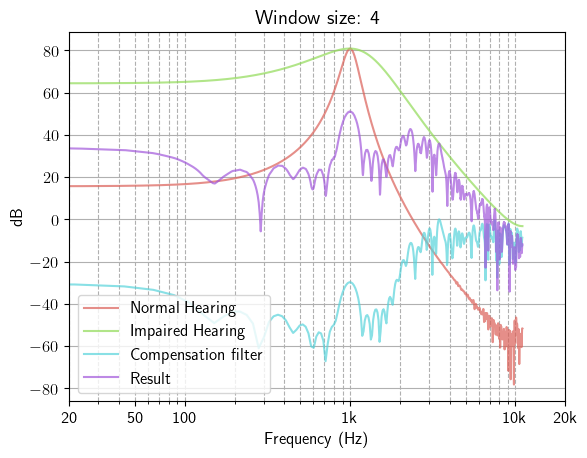

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join("..")))
from tools import plot, utils

# Fixed number of taps
taps = 128

# List of win_sizes for which you want to create the animation
win_sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]  # Add more win_sizes as needed

# Create a figure and axes outside the update function
fig, ax = plt.subplots(1, 1)

# Create a function to update the plot for each frame of the animation
def update(frame):
    # Clear the current plot
    ax.clear()
    # Get the data for the current win_size
    win_size = win_sizes[frame]
    freq_axes_data = data_dict[taps][win_size]['freq_axes']
    spec_axes_data = data_dict[taps][win_size]['spec_axes']
    
    # reset axes
    freq_axes = []
    spec_axes = []
    
    # Axes order: [0] "Normal Hearing",
    # [1] "Impaired Hearing",
    # [2] "Ideal",
    # [3] "Compensation filter",
    # [4] "Wiener filter",
    
    freq_axes.append(freq_axes_data[0])
    freq_axes.append(freq_axes_data[1])
    freq_axes.append(freq_axes_data[3])
    freq_axes.append(freq_axes_data[0])
    
    spec_axes.append(spec_axes_data[0])
    spec_axes.append(spec_axes_data[1])
    spec_axes.append(spec_axes_data[3])
    spec_axes.append(linear_interpolate(spec_axes_data[3], spec_axes_data[1])* spec_axes_data[1]) # compensation filter multiplied with impaired filter
    
    labels = [
        "Normal Hearing",
        "Impaired Hearing",
        "Compensation filter",
        "Result",
    ]

    # Plot the data (customize this according to your data structure)
    plot.magspec_anim(
        ax=ax,
        freq_axes=freq_axes,
        spec_axes=spec_axes,
        units="dB",
        title=f"Window size: {win_size}",
        labels=labels,
    )

# Create a figure and an animation
ani = animation.FuncAnimation(fig, update, frames=len(win_sizes), repeat=True, blit=False)
# Define the filename and format for saving the animation
save_filename = f'taps_{taps}.mp4'  # Change the filename and format as needed

# Save the animation as a video file (e.g., MP4)
ani.save(save_filename, writer='ffmpeg')  # You may need to install FFmpeg for this to work


Loop through all

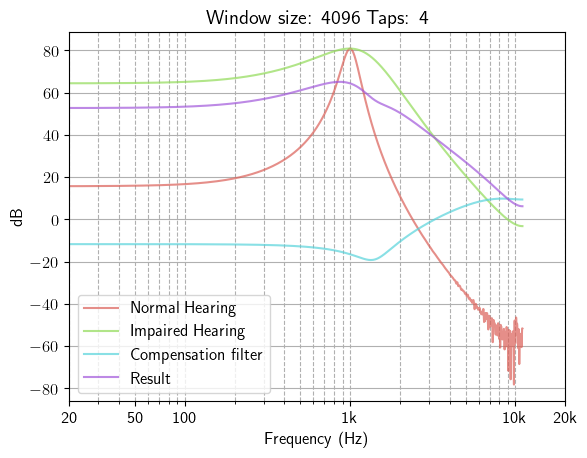

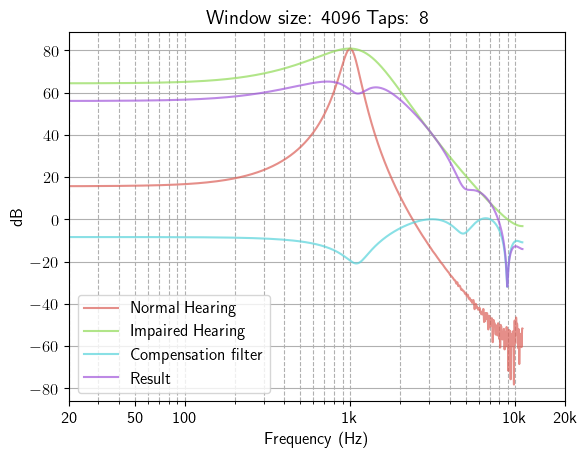

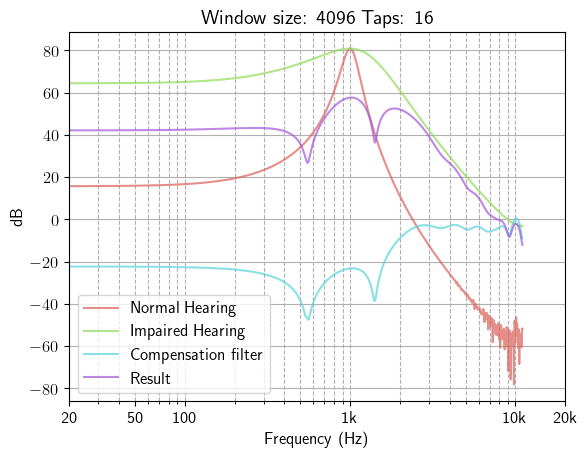

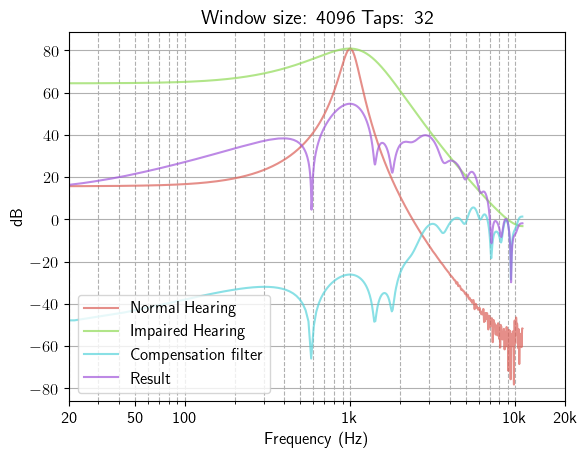

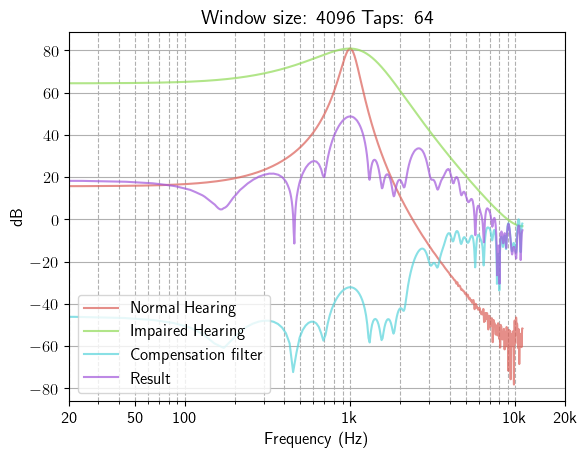

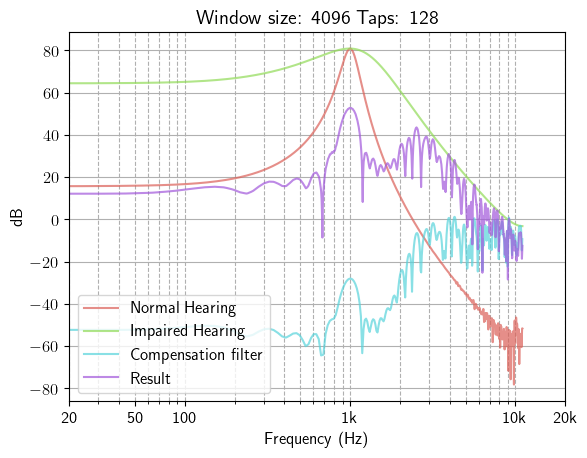

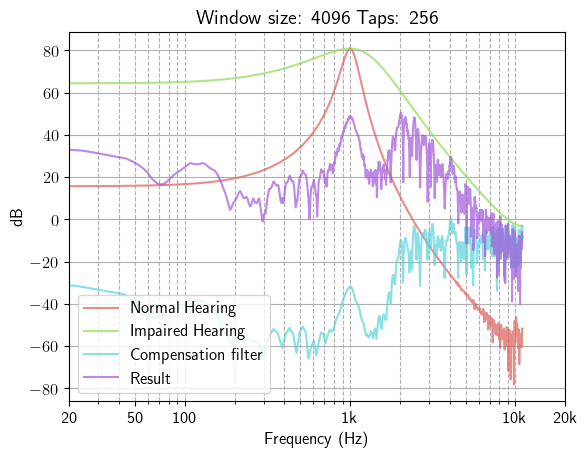

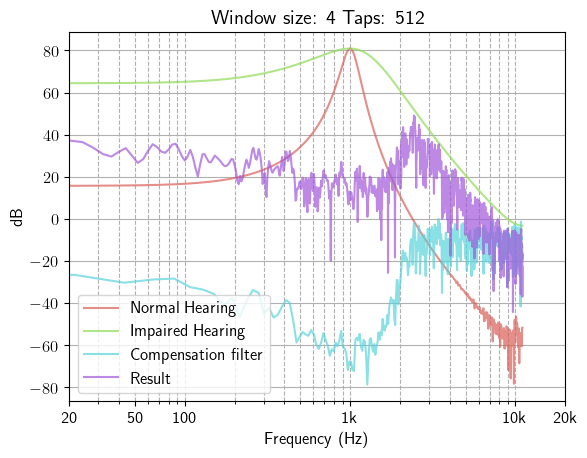

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join("..")))
from tools import plot, utils

# Fixed number of taps
for taps in [4, 8, 16, 32, 64, 128, 256, 512]:

    # List of win_sizes for which you want to create the animation
    win_sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]  # Add more win_sizes as needed

    # Create a figure and axes outside the update function
    fig, ax = plt.subplots(1, 1)

    # Create a function to update the plot for each frame of the animation
    def update(frame):
        # Clear the current plot
        ax.clear()
        # Get the data for the current win_size
        win_size = win_sizes[frame]
        freq_axes_data = data_dict[taps][win_size]['freq_axes']
        spec_axes_data = data_dict[taps][win_size]['spec_axes']
        
        # reset axes
        freq_axes = []
        spec_axes = []
        
        # Axes order: [0] "Normal Hearing",
        # [1] "Impaired Hearing",
        # [2] "Ideal",
        # [3] "Compensation filter",
        # [4] "Wiener filter",
        
        freq_axes.append(freq_axes_data[0])
        freq_axes.append(freq_axes_data[1])
        freq_axes.append(freq_axes_data[3])
        freq_axes.append(freq_axes_data[0])
        
        spec_axes.append(spec_axes_data[0])
        spec_axes.append(spec_axes_data[1])
        spec_axes.append(spec_axes_data[3])
        spec_axes.append(linear_interpolate(spec_axes_data[3], spec_axes_data[1])* spec_axes_data[1]) # compensation filter multiplied with impaired filter
        
        labels = [
            "Normal Hearing",
            "Impaired Hearing",
            "Compensation filter",
            "Result",
        ]

        # Plot the data (customize this according to your data structure)
        plot.magspec_anim(
            ax=ax,
            freq_axes=freq_axes,
            spec_axes=spec_axes,
            units="dB",
            title=f"Window size: {win_size} Taps: {taps}",
            labels=labels,
        )

    # Create a figure and an animation
    ani = animation.FuncAnimation(fig, update, frames=len(win_sizes), repeat=True, blit=False)
    # Define the filename and format for saving the animation
    save_filename = f'taps_{taps}.mp4'  # Change the filename and format as needed

    # Save the animation as a video file (e.g., MP4)
    ani.save(save_filename, writer='ffmpeg')  # You may need to install FFmpeg for this to work


In [47]:
import seaborn as sns
p = sns.color_palette("viridis", n_colors=	16)
print(p.as_hex())
# print(p)

# for col in p:
#     print('\definecolor{col1}{RGB}','{',col[0],
#           ',',col[1],
#           ',',col[2
#                                                           ],'}')
p

['#481769', '#472a7a', '#433d84', '#3d4e8a', '#355e8d', '#2e6d8e', '#297b8e', '#23898e', '#1f978b', '#21a585', '#2eb37c', '#46c06f', '#65cb5e', '#89d548', '#b0dd2f', '#d8e219']


[(0.281924, 0.089666, 0.412415),
 (0.280255, 0.165693, 0.476498),
 (0.263663, 0.237631, 0.518762),
 (0.237441, 0.305202, 0.541921),
 (0.208623, 0.367752, 0.552675),
 (0.182256, 0.426184, 0.55712),
 (0.159194, 0.482237, 0.558073),
 (0.13777, 0.537492, 0.554906),
 (0.121148, 0.592739, 0.544641),
 (0.128087, 0.647749, 0.523491),
 (0.180653, 0.701402, 0.488189),
 (0.274149, 0.751988, 0.436601),
 (0.395174, 0.797475, 0.367757),
 (0.535621, 0.835785, 0.281908),
 (0.688944, 0.865448, 0.182725),
 (0.845561, 0.887322, 0.099702)]

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from IPython.display import display, clear_output

# # Fixed number of taps
# taps = 128

# # List of win_sizes for which you want to create the animation
# win_sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]  # Add more win_sizes as needed

# # Create a function to update the plot for each frame of the animation
# def update(frame):
#     # Clear the current plot
#     plt.clf()
#     # Get the data for the current win_size
#     win_size = win_sizes[frame]
#     freq_axes_data = data_dict[taps][win_size]['freq_axes']
#     spec_axes_data = data_dict[taps][win_size]['spec_axes']
    
#     # reset axes
#     freq_axes = []
#     spec_axes = []
    
#     # Axes order: [0] "Normal Hearing",
#     # [1] "Impaired Hearing",
#     # [2] "Ideal",
#     # [3] "Compensation filter",
#     # [4] "Wiener filter",
    
#     freq_axes.append(freq_axes_data[0])
#     freq_axes.append(freq_axes_data[1])
#     freq_axes.append(freq_axes_data[3])
#     freq_axes.append(freq_axes_data[3])
    
#     spec_axes.append(spec_axes_data[0])
#     spec_axes.append(spec_axes_data[1])
#     spec_axes.append(spec_axes_data[3])
#     # spec_axes.append(spec_axes_data[3] * spec_axes_data[1]) # compensation filter multiplied with impaired filter
    
#     labels = [
#         "Normal Hearing",
#         "Impaired Hearing",
#         "Compensation filter",
#         "Result",
#     ]

#     # Plot the data (customize this according to your data structure)
#     _, ax = plt.subplots(1,1)
#     plot.magspec_anim(
#         ax=ax,
#         freq_axes=freq_axes,
#         spec_axes=spec_axes,
#         units="dB",
#         title=f"{win_size}",
#         labels=labels,
#     )

# # Create a figure and an animation
# fig = plt.figure()
# ani = FuncAnimation(fig, update, frames=len(win_sizes), repeat=False, blit=True)

# # # Display the animation in the notebook
# # %matplotlib notebook
# # display(fig)


<IPython.core.display.Javascript object>